<a href="https://colab.research.google.com/github/JimenezHAnaFer/SIMULACION-1/blob/main/Ejercicio_19_05_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema de flecha

Una flecha sera ensamblada en un cojinete como se muestra a continuación

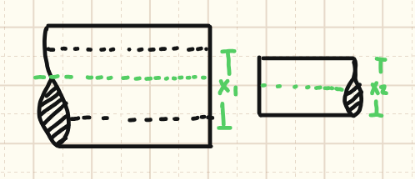

Si $x_1$ sigue una distribución normal con media de 1.5 y varianza 0.0016, $x_2$ sigue esta misma distribución con media 1.48 y varianza de 0.0009.

**Determinar**

a)Probabilidad dde interferencia

b)El N° de veces que es necesario hacer el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero de 0.01 con un nivel de seguridad del 95 %

#Solución

**Paso 1**


Identifique las variables

$$x_1 \sim N(1.5, 0.004)$$
$$x_1 \sim N(1.48, 0.03)$$


**Paso 2**

Determine la distribución de probabilidad


$$x_1 \sim f(x) = \frac{1}{(0.04)\sqrt{2\pi}} e^{-\frac{1}{2} \frac{(x-1.5)^2}{(0.04)^2}}$$

$$x_2 \sim f(x) = \frac{1}{(0.03)\sqrt{2\pi}} e^{-\frac{1}{2} \frac{(x-1.48)^2}{(0.03)^2}}$$

**Paso 3**

**Modelar las variables aleatorias**

Usaremos el metodo de **Box Müller**, ya que es más preciso y además entran dos variables y regresa dos variables lo que computacionalmete lo hace mejor.
Descartamos la opción de usar el método de las 12 uniformes ya que para crear una variables por experimento necesitamos 12 variables, lo cual computaionalmente es muy caro.

**Paso 4 (a)**

Definir el modelo y los objetivos de la simulación

1. Condición de interferencia:
$$x_2 \geq x_1$$

2. Buscamos que:
$$P(x_2\geq x_1)$$

**Paso 5**

Pseudocódigo:

\begin{aligned}
&\text{}  n  = 10 \\
&\text{Generar } x_1, x_2 \sim N(\mu,σ) \\
&\text{Si } x_2 \geq x_1  \\
&\text{Calcular la probabilidad de la forma }  \\
&\text{Suma de interferencias  } \text{exitos}/10
\end{aligned}

**Paso 6**

Repetir M veces el experimento

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import norm

#Definir el experimento
def experimento(x):
    exitos = 0
    for i in range(x):
        x1 = np.random.normal(1.5, 0.04,1)
        x2 = np.random.normal(1.48, 0.03,1)
        if x2 >= x1:
            exitos += 1
    prob = exitos / x
    return prob

#Realizar m experimentos para la muestra
m = 1000

lista = []
for i in range(m):
    lista.append(experimento(i+1))
print(lista)

[0.0, 0.5, 0.3333333333333333, 0.0, 0.2, 0.5, 0.2857142857142857, 0.5, 0.3333333333333333, 0.4, 0.36363636363636365, 0.25, 0.15384615384615385, 0.5, 0.3333333333333333, 0.1875, 0.4117647058823529, 0.3333333333333333, 0.47368421052631576, 0.35, 0.3333333333333333, 0.3181818181818182, 0.30434782608695654, 0.375, 0.32, 0.34615384615384615, 0.25925925925925924, 0.2857142857142857, 0.5517241379310345, 0.2, 0.3548387096774194, 0.3125, 0.3333333333333333, 0.4117647058823529, 0.3142857142857143, 0.3611111111111111, 0.24324324324324326, 0.4473684210526316, 0.3076923076923077, 0.325, 0.17073170731707318, 0.2619047619047619, 0.46511627906976744, 0.38636363636363635, 0.3333333333333333, 0.30434782608695654, 0.3829787234042553, 0.3958333333333333, 0.2857142857142857, 0.26, 0.3137254901960784, 0.2692307692307692, 0.4716981132075472, 0.3888888888888889, 0.3090909090909091, 0.3392857142857143, 0.42105263157894735, 0.43103448275862066, 0.3050847457627119, 0.3, 0.39344262295081966, 0.3870967741935484, 0

**Paso 7**

Determinar el tamaño de la muestra

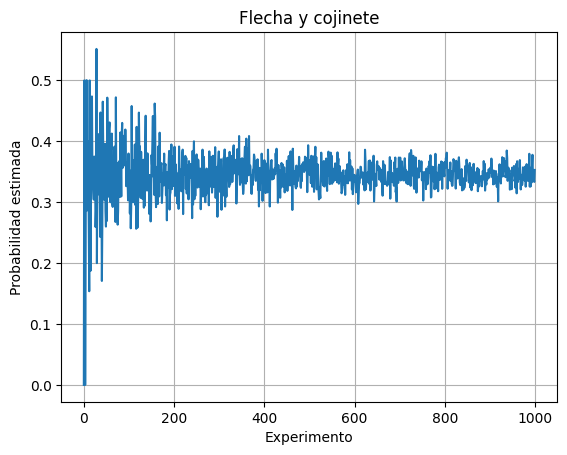

In [28]:
plt.plot(lista)
plt.xlabel('Experimento')
plt.ylabel('Probabilidad estimada')
plt.title('Flecha y cojinete')
plt.grid(True)
plt.show()

In [29]:
print("La media es: ", np.mean(lista))
print("La varianza es: ", np.var(lista))
print("La desviación estándar es: ", np.std(lista))

La media es:  0.3450546003781226
La varianza es:  0.0013015590009264242
La desviación estándar es:  0.03607712572983641


**Paso 4 (b)**

Determinar el número de veces necesario $N$ para realizar el experimento si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en máximo 0.01, con un nivel de confianza del 67%.

**Paso 5**

Pseudocódigo:

**error = 0.01**

**confianza = 0.67**

**z = 0.97  # valor para 67% confianza**

**calcular_probabilidad_teorica**

**Realizar N experimentos**

**Mostrar resultados**


**Paso 6**

Cálculo del Tamaño de Muestra $N$

1. Fórmula para $N$:

$$N \geq (\frac{z}{E})^2p(1-p) $$

Donde

$z=$ 0.97 (para 67% confianza)

$E=$0.01

$p \approx$  Valor teórico o una estimación conservadora ($p=0.5$ maximiza $N$)

$$N \geq (\frac{0.97}{0.01})^2(0.25) \approx 2352$$

In [33]:
#Cálculo teórico
mu_dif=1.48 - 1.5
sigma_dif=np.sqrt(0.03**2 + 0.04**2)
prob_teorica=1 - norm.cdf(0, loc=mu_dif, scale=sigma_dif)

error_maximo = 0.01
confianza = 0.67

#Cálculo de n necesario (fórmula estadística)
z = norm.ppf((1 + confianza)/2)
n_necesario = int((z**2 * prob_teorica * (1 - prob_teorica)) / (error_maximo**2)) + 1

prob_estimada = experimento(n_necesario)
diferencia = abs(prob_estimada - prob_teorica)


print('Probabilidad teórica:', prob_teorica)
print('Experimentos necesarios:', n_necesario)
print('Probabilidad estimada:', prob_estimada)
print('Diferencia:', diferencia)
print('¿Cumple con el error?','Sí' if diferencia <= error_maximo else 'No')


Probabilidad teórica: 0.3445782583896757
Experimentos necesarios: 2144
Probabilidad estimada: 0.33861940298507465
Diferencia: 0.00595885540460106
¿Cumple con el error? Sí
